In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Libraries
import pandas as pd
import numpy as np
import os

# Plotting
from matplotlib import pyplot as plt
# from matplotlib_venn import venn3, venn3_circles 
from venny4py.venny4py import *
import seaborn as sns

In [3]:
os.chdir('/Users/magdalena/OneDrive - Queen Mary, University of London/bezzlab/research/projects/phospho_pi/')
# os.chdir('/home/mhuebner/Desktop/bezzlab/research/projects/phospho_pi/')

#### Chapter 2

In [4]:
clines = ['HL60', 'MCF7', 'NTERA2']

In [5]:
# data
p_fc = dict()
for cline in ['HL60', 'MCF7', 'NTERA2']:
    p_fc[cline] = pd.read_csv(f'data/processed/ebdt_data/p_fc_{cline}.csv')
    p_fc[cline]['cline'] = cline

In [6]:
es_interaction = pd.read_csv('data/processed/ebdt_data/es_interaction.csv')
es_interaction_c = pd.read_csv('data/processed/ebdt_data/es_interaction_cantley.csv')
e_function = pd.read_csv('data/processed/ebdt_data/e_function.csv')
p_function = pd.read_csv('data/processed/ebdt_data/p_function.csv')

In [7]:
es_interaction_c = es_interaction_c.loc[es_interaction_c['percentile'] > 0.995]
es_interaction_c

,enzyme,substrate,percentile
33,AAK1,MUC21(S590),0.9951
40,AAK1,MUC21(S620),0.9951
46,AAK1,ZC3H11B(T763),0.9983
164,AAK1,CCDC88B(T1366),0.9998
260,AAK1,ZSWIM8(T55),0.9983
...,...,...,...
8192810,ZAK,PRRC2C(T25),0.9994
8192906,ZAK,SNX11(S246),0.9957
8192989,ZAK,MYH4(T69),0.9973
8193044,ZAK,ARFGEF1(T1564),0.9974


Plot A

In [10]:
# Count the occurrences of each function
function_counts = p_function['function'].value_counts()
function_counts.index = ['NA', 'inc', 'dec', 'conflict']

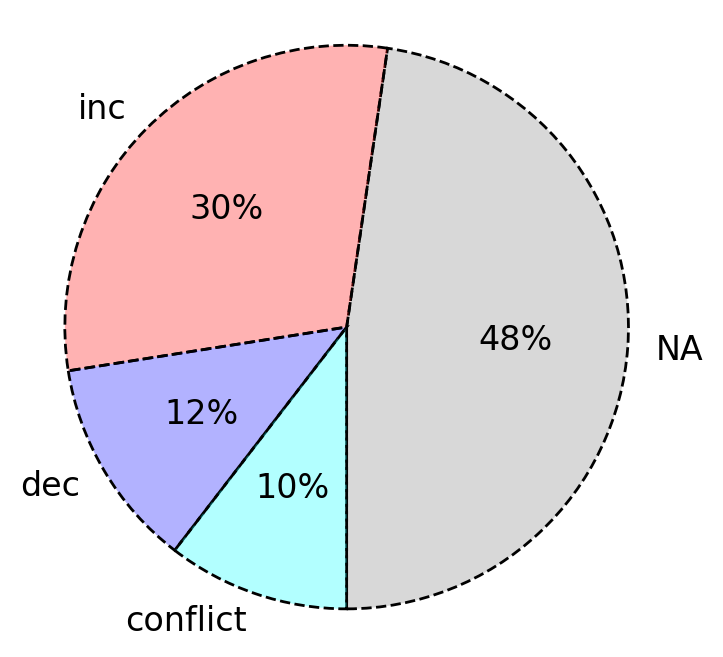

In [11]:
# Define shades with transparency
my_colors = [
    (0.5, 0.5, 0.5, 0.3),  # Grey with alpha 0.3
    (1, 0, 0, 0.3),        # Red with alpha 0.3
    (0, 0, 1, 0.3),        # Blue with alpha 0.3
    (0, 1, 1, 0.3),        # Cyan with alpha 0.3
]
my_colors = my_colors[:len(function_counts)]

# Plotting the pie chart
plt.figure(figsize=(4, 4), dpi=200)
wedges, texts, autotexts = plt.pie(function_counts, labels=function_counts.index, autopct='%1.0f%%', 
                                   startangle=270, colors=my_colors, textprops={'fontsize': 12}, 
                                   wedgeprops={'edgecolor' : 'black', 
                                               'linewidth': 1,
                                               'linestyle': '--',
                                               'antialiased': True})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Plot B

In [11]:
kinases = set(e_function.loc[e_function['function'] == 'kinase', 'enzyme'])
phosphatases = set(e_function.loc[e_function['function'] == 'phosphatase', 'enzyme'])

In [12]:
modification_counts = es_interaction.merge(e_function, on='enzyme', how='left').groupby('function').count()['enzyme']
modification_counts.index = ['p+', 'p-']

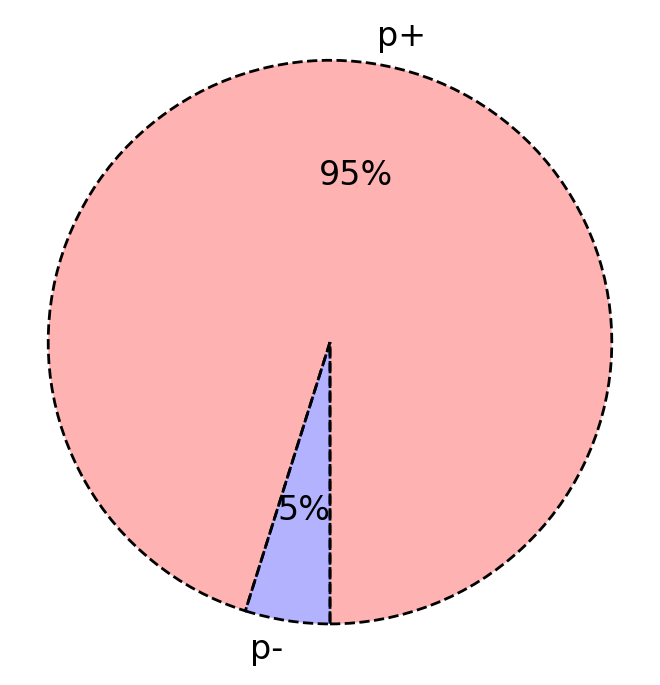

In [14]:
# Define shades with transparency
my_colors = [
    (1, 0, 0, 0.3),        # Red with alpha 0.3
    (0, 0, 1, 0.3),        # Blue with alpha 0.3
]
my_colors = my_colors[:len(modification_counts)]

# Plotting the pie chart
plt.figure(figsize=(4, 4), dpi=200)
wedges, texts, autotexts = plt.pie(modification_counts, labels=modification_counts.index, autopct='%1.0f%%', 
                                   startangle=270, colors=my_colors, textprops={'fontsize': 12}, 
                                   wedgeprops={'edgecolor' : 'black', 
                                               'linewidth': 1,
                                               'linestyle': '--',
                                               'antialiased': True})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

Plot C

In [13]:
unique_p_fc = set(p_fc['HL60']['phosphosite']).union(set(p_fc['MCF7']['phosphosite']), set(p_fc['NTERA2']['phosphosite']))
unique_p_function = set(p_function.loc[p_function['function'] != 'unknown', 'phosphosite'])
unique_p_esint = set(es_interaction['substrate'])
unique_p_esint_c = set(es_interaction_c['substrate'])

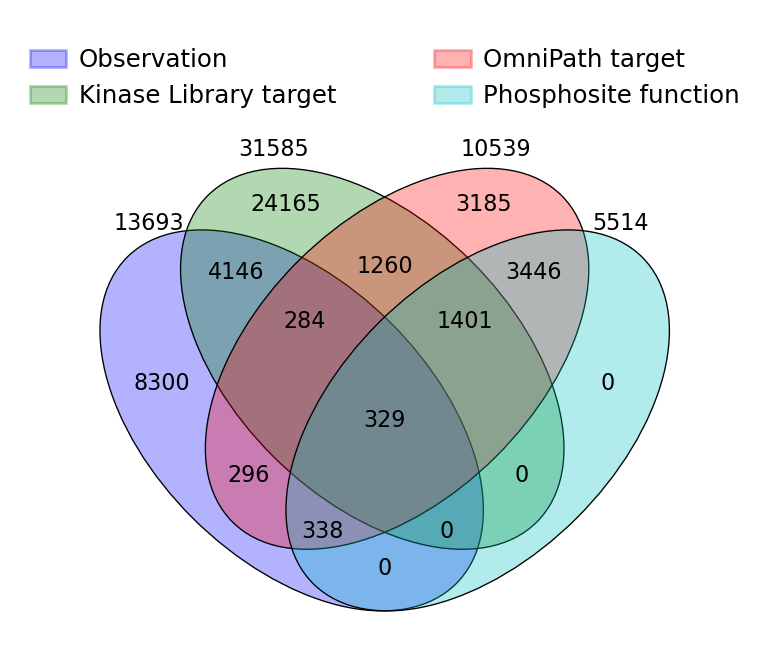

In [14]:
#dict of sets
sets = {
    'Observation': unique_p_fc,
    'Kinase Library target': unique_p_esint_c,
    'OmniPath target': unique_p_esint,
    'Phosphosite function': unique_p_function
    }

venny4py(sets=sets, size=4)

Plot D

In [15]:
# Initialize plot_data outside the loop
plot_data = pd.DataFrame()

for cline in ['HL60', 'MCF7', 'NTERA2']:
    
    count_obs = len(set(p_fc[cline]['phosphosite']))
    count_esint_c = len(set(p_fc[cline]['phosphosite']) & set(es_interaction_c['substrate']))
    count_esint = len(set(p_fc[cline]['phosphosite']) & set(es_interaction['substrate']))
    count_sign = len(set(p_fc[cline]['phosphosite']) & set(p_function.loc[p_function['function'] != 'unknown', 'phosphosite']))

    # Prepare data for this iteration
    temp_data = pd.DataFrame({
        'Cell Line': [cline] * 4,
        'Count': [count_obs, count_esint_c, count_esint, count_sign],
        'Source': ['Obs', 'KinLib', 'OmniPath', 'Function']
    })

    # Append the data from this iteration to plot_data
    plot_data = pd.concat([plot_data, temp_data], axis=0)

# Reset the index after concatenating all the data
plot_data.reset_index(drop=True, inplace=True)
plot_data

,Cell Line,Count,Source
0,HL60,13460,Obs
1,HL60,4679,KinLib
2,HL60,1231,OmniPath
3,HL60,654,Function
4,MCF7,13565,Obs
5,MCF7,4725,KinLib
6,MCF7,1238,OmniPath
7,MCF7,662,Function
8,NTERA2,13623,Obs
9,NTERA2,4728,KinLib


/var/folders/l3/vxqxpwf10_x9jp7g4_x9yy9m0000gn/T/ipykernel_81529/809315963.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=12)


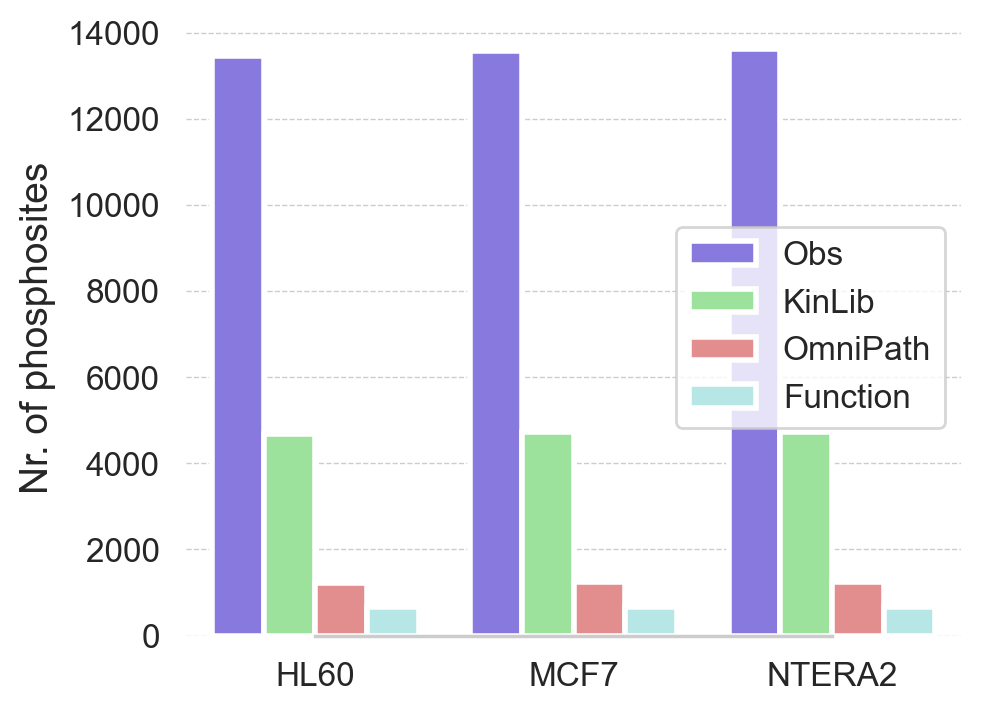

In [16]:
# Assuming plot_data is already defined and prepared
# Define custom colors without transparency
palette_colors = ['mediumslateblue', 'lightgreen', 'lightcoral', 'paleturquoise']

sns.set(style="whitegrid")  # Start with a white grid style

# Create a square plot with specified figure size
plt.figure(figsize=(5, 4), dpi=200)  # This creates a plot with a square aspect ratio

barplot = sns.barplot(data=plot_data, x='Cell Line', y='Count', hue='Source', palette=palette_colors)

# Set the y-axis label with a larger font size
barplot.set_ylabel('Nr. of phosphosites', fontsize=14)

# Remove the x-axis label
barplot.set_xlabel('')

# Increase the font size of the x-tick labels
barplot.set_yticklabels(barplot.get_yticklabels(), fontsize=12)
barplot.set_xticklabels(barplot.get_xticklabels(), fontsize=12)

for bar in barplot.patches:
    bar.set_edgecolor('white')
    bar.set_linewidth(2)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5, axis='y')

# Adjust the legend to have no title and larger font size
plt.legend(loc='right', fontsize=12)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=len(plot_data['Source'].unique()), fontsize=12)

# Optional: Improve layout with tight_layout
# plt.tight_layout()

# Adjust the top margin to make space for the legend without the title
# plt.subplots_adjust(top=1)

# Despine for aesthetics
sns.despine(trim=True, left=True)
# Display the plot
plt.show()

#### Chapter 4

In [9]:
# data
p_fc_tp = {}
for cline in ['HL60', 'MCF7', 'NTERA2']:
    p_fc_tp[cline] = pd.read_csv(f'data/processed/ebdt_data/p_fc_{cline}_tp.csv') # change to scaled version
    p_fc_tp[cline]['cline'] = cline

In [10]:
p_fc_allcl = pd.concat([p_fc['HL60'], p_fc['MCF7'], p_fc['NTERA2']], axis=0)
p_fc_tp_allcl = pd.concat([p_fc_tp['HL60'], p_fc_tp['MCF7'], p_fc_tp['NTERA2']], axis=0)

Plot A

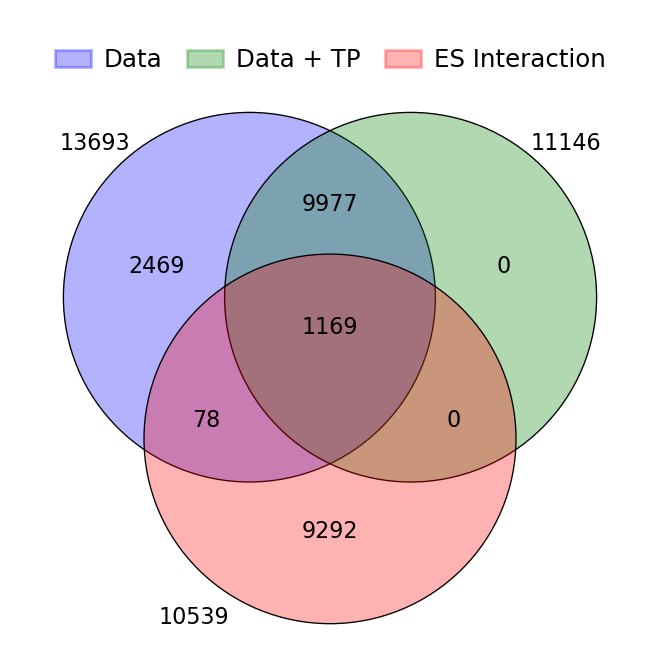

In [10]:
#dict of sets
sets = {
    'Data': set(p_fc_allcl['phosphosite']),
    'Data + TP': set(p_fc_tp_allcl['phosphosite']),
    'ES Interaction': set(es_interaction['substrate'])
    }

venny4py(sets=sets, size=4)

Plot B

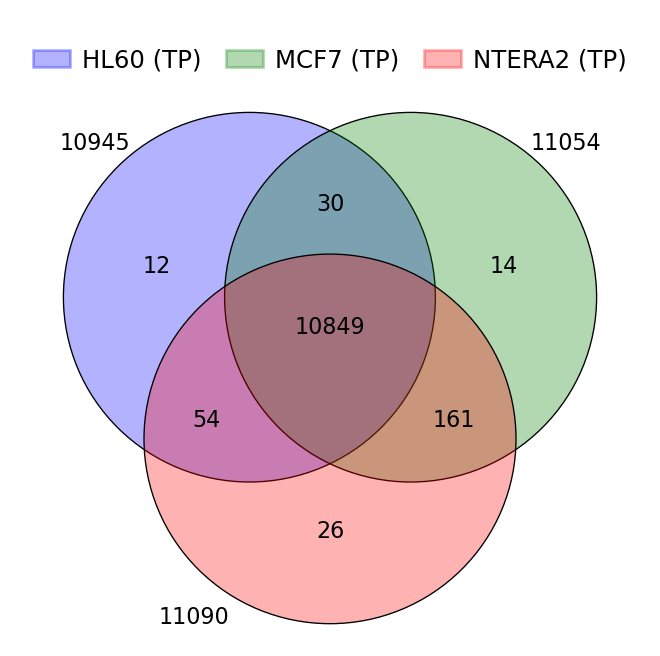

In [11]:
#dict of sets
sets = {
    'HL60 (TP)': set(p_fc_tp['HL60']['phosphosite']),
    'MCF7 (TP)': set(p_fc_tp['MCF7']['phosphosite']),
    'NTERA2 (TP)': set(p_fc_tp['NTERA2']['phosphosite']),
    }

venny4py(sets=sets, size=4)

Plot C

In [11]:
p_regulates = pd.read_csv('data/processed/ebdt_data/p_regulates.csv')
kinases = set(e_function.loc[e_function['function'] == 'kinase', 'enzyme'])
phosphatases = set(e_function.loc[e_function['function'] == 'phosphatase', 'enzyme'])

In [12]:
p_regulates_e = p_regulates[p_regulates['protein'].isin(e_function['enzyme'])]
p_regulates_e = p_regulates_e[p_regulates_e['phosphosite'].isin(set(p_fc_tp_allcl['phosphosite']))]
p_count = p_regulates_e['protein'].value_counts()
p_count_k = p_count[p_count.index.isin(kinases)]
p_count_pa = p_count[p_count.index.isin(phosphatases)]
p_count_pa = pd.DataFrame(p_count_pa.value_counts()).reset_index()
p_count_k = pd.DataFrame(p_count_k.value_counts()).reset_index()
# merge p_count_k and p_count_pa and fill NaN with 0 and add suffixes, keep integers
p_count_k_pa = p_count_k.merge(p_count_pa, how='outer', on='index', suffixes=('_k', '_pa')).fillna('0').astype(int)

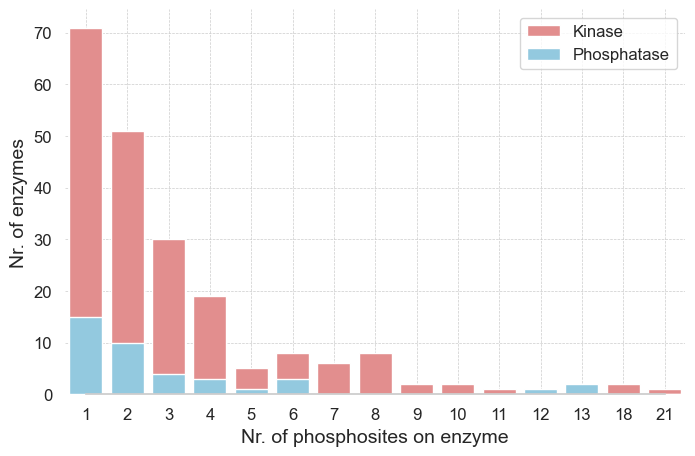

In [14]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(8, 5), dpi=100)

# Plot the first set of bars for 'protein_k'
sns.barplot(x='index', y='protein_k', data=p_count_k_pa, color='lightcoral', label='Kinase')
sns.barplot(x='index', y='protein_pa', data=p_count_k_pa, color='skyblue', label='Phosphatase')

plt.xlabel('Nr. of phosphosites on enzyme', fontsize=14)
plt.ylabel('Nr. of enzymes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5)

# Add legend
plt.legend(title=None, fontsize='12')

# Despine for aesthetics
sns.despine(trim=True, left=True)
plt.show()

Plot D

In [13]:
# 1. Histogram of the percentage of phosphosites per protein and sample that is decreasing
merged_df = p_fc_tp_allcl.merge(p_regulates_e, on='phosphosite', how='inner')
merged_df_dec = merged_df[merged_df['value'] == 'dec']
perc_dec = merged_df_dec.groupby(['protein', 'sample', 'cline']).size() / merged_df.groupby(['protein', 'sample', 'cline']).size() * 100
perc_dec.fillna(0, inplace=True)

In [14]:
# select proteins where p_count > x
perc_dec_1 = perc_dec[perc_dec.index.get_level_values('protein').isin(p_count[p_count == 1].index)]
perc_dec_2 = perc_dec[perc_dec.index.get_level_values('protein').isin(p_count[p_count == 2].index)]
perc_dec_3 = perc_dec[perc_dec.index.get_level_values('protein').isin(p_count[p_count == 3].index)]
perc_dec_g = perc_dec[perc_dec.index.get_level_values('protein').isin(p_count[p_count > 4].index)]

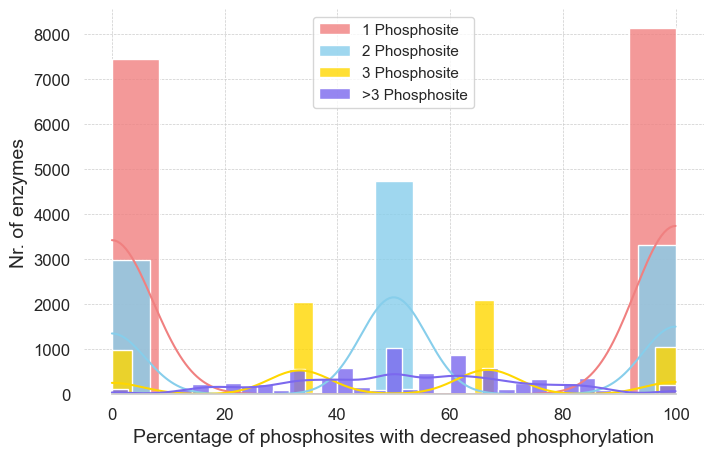

In [17]:
sns.set(style="whitegrid")  # Start with a white grid style

plt.figure(figsize=(8, 5), dpi=100)

# Plot each histogram with a label and custom color, adjusting alpha for opacity
sns.histplot(perc_dec_1, kde=True, bins=12, color="lightcoral", label="1 Phosphosite", alpha=0.8)
sns.histplot(perc_dec_2, kde=True, color="skyblue", label="2 Phosphosite", alpha=0.8)
sns.histplot(perc_dec_3, kde=True, color="gold", label="3 Phosphosite", alpha=0.8)
sns.histplot(perc_dec_g, kde=True, color="mediumslateblue", label=">3 Phosphosite", alpha=0.8)

plt.xlabel('Percentage of phosphosites with decreased phosphorylation', fontsize=14)
plt.ylabel('Nr. of enzymes', fontsize=14)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5)

# Increase the legibility of the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title=None)

# Despine for aesthetics
sns.despine(trim=True, left=True)

plt.show()

Plot E

In [15]:
# read in interactions
es_interaction = {}
es_interaction = pd.read_csv('data/processed/ebdt_data/run2/es_interaction.csv')
# es_interaction['MCF7'] = pd.read_csv('data/processed/ebdt_data/run3/es_interaction.csv')
# es_interaction['NTERA2'] = pd.read_csv('data/processed/ebdt_data/run4/es_interaction.csv')
# read in filtered interactions
es_filt = {}
es_filt = pd.read_csv('data/processed/ebdt_data/run2/es_interaction_top7enz.csv')
# es_filt['MCF7'] = pd.read_csv('data/processed/ebdt_data/run3/es_interaction_top7enz.csv')
# es_filt['NTERA2'] = pd.read_csv('data/processed/ebdt_data/run4/es_interaction_top7enz.csv')

In [16]:
e_count = es_interaction['substrate'].value_counts()
e_count = pd.DataFrame(e_count.value_counts()).reset_index()
e_count.columns = ['enzymes', 'count']
e_count['label'] = 'All interactions'
e_count_filt = es_filt['substrate'].value_counts()
e_count_filt = pd.DataFrame(e_count_filt.value_counts()).reset_index()
e_count_filt.columns = ['enzymes', 'count']
e_count_filt['label'] = 'Top correlated interactions'
# concatenate all clines in e_count
# e_count_allcl = pd.concat([e_count['HL60'], e_count['MCF7'], e_count['NTERA2']], axis=0)
# e_count_allcl_filt = pd.concat([e_count_filt['HL60'], e_count_filt['MCF7'], e_count_filt['NTERA2']], axis=0)

In [17]:
e_count_all = pd.concat([e_count, e_count_filt], axis=0)

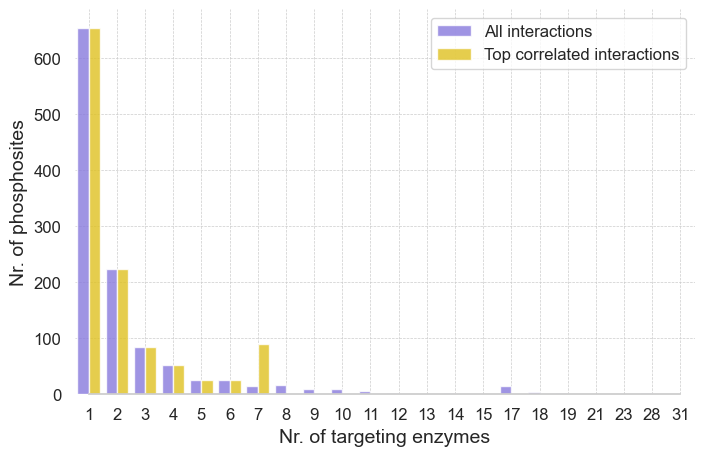

In [23]:
sns.set(style="whitegrid")  # Start with a white grid style

# Save the current Seaborn settings
current_context = sns.plotting_context()
current_style = sns.axes_style()

# Reset to Matplotlib defaults
plt.rcdefaults()

# Reapply the saved Seaborn settings except for the color palette
sns.set_context(current_context)
sns.set_style(current_style)

plt.figure(figsize=(8, 5), dpi=100)

# Plot the first set of bars for 'protein_k'
sns.barplot(x='enzymes', y='count', hue='label', data=e_count_all, palette=['mediumslateblue', 'gold'], alpha=0.8)

plt.xlabel('Nr. of targeting enzymes', fontsize=14)
plt.ylabel('Nr. of phosphosites', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve the grid, make it lighter
plt.grid(True, linestyle='--', linewidth=0.5)

# Add legend
plt.legend(title=None, fontsize='12', loc='upper right')

# Despine for aesthetics
sns.despine(trim=True, left=True)
plt.show()

Plots with activity

Plot F

In [18]:
ksea = {}
ksea_pen = {}
for cline in clines:
    ksea[cline] = pd.read_csv(f'data/processed/ebdt_data/e_ksea_{cline}.csv')
    ksea[cline]['cline'] = cline
    ksea_pen[cline] = pd.read_csv(f'data/processed/ebdt_data/e_ksea_penalised_{cline}.csv')
    ksea_pen[cline]['cline'] = cline

In [19]:
ksea_allcl = pd.concat([ksea['HL60'], ksea['MCF7'], ksea['NTERA2']], axis=0)
ksea_pen_allcl = pd.concat([ksea_pen['HL60'], ksea_pen['MCF7'], ksea_pen['NTERA2']], axis=0)

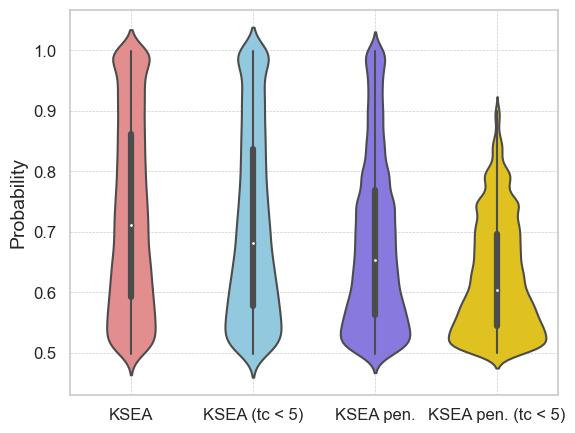

In [25]:
sns.set(style="whitegrid")  # Start with a white grid style

# Creating the combined violin plot for both datasets
plt.figure(figsize=(6.3, 5), dpi=100)

# Adding datasets to the same plot
sns.violinplot(data=[ksea_allcl['prob'], 
                     ksea_allcl[ksea_allcl['tc'] < 5]['prob'], 
                     ksea_pen_allcl['prob'], 
                     ksea_pen_allcl[ksea_pen_allcl['tc'] < 5]['prob']], 
                     palette=['lightcoral', 'skyblue', 'mediumslateblue', 'gold'], alpha=0.8)

# Setting the x-axis labels for clarity
plt.yticks(fontsize=12)
plt.xticks([0, 1, 2, 3], ['KSEA', 'KSEA (tc < 5)', 'KSEA pen.', 'KSEA pen. (tc < 5)'], fontsize=12)
plt.ylabel('Probability', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

* correlation of activity kinases with one phosphosite with phosphosite (hm, scatterplot) mark kianses/phosphatases
* correlation of activity kinases with multiple phosphosite with average phosphosite (hm, scatterplot)
* correlation of activity kinases with multiple phosphosite with all phosphosites (hm) - compare cell lines?
* correlation of activity kinases with downstream proteins??

* compare sid with pst(tp) are true positives enriched with higher sid
* also correlation of ratio with activity (ksea) and activity (predicted)

--> maybe it's related to the kinase activity probabilities (because not scaled)
--> try with scaled fc, scale kinases, try with actual fold changes, only look at correlation of label